# Exploratory analysis
A brief exploratory analysis example. 

### Iris datasets
The exploratory analysis is done using iris dataset.

In [62]:
source("https://raw.githubusercontent.com/eogasawara/mylibrary/master/myGraphic.R")

In [63]:
plot.size(12, 5)
colors <- brewer.pal(11, 'Paired')
font <- theme(text = element_text(size=16))

## Part 1

In [48]:
loadlibrary("MASS")
data(iris)

In [49]:
head(iris[c(1:3,51:53,101:103),])

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
51,7.0,3.2,4.7,1.4,versicolor
52,6.4,3.2,4.5,1.5,versicolor
53,6.9,3.1,4.9,1.5,versicolor


### Data Summary
A preliminary analysis using the $Sepal.Length$ attribute. 

This should be done for all attributes. 

In [50]:
sum <- summary(iris$Sepal.Length)
sum

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.300   5.100   5.800   5.843   6.400   7.900 

In [51]:
IQR <- sum["3rd Qu."]-sum["1st Qu."]
print(sprintf("IQR=%.1f", IQR))

[1] "IQR=1.3"


## Part 2

### Histogram analysis

Using  as id variables



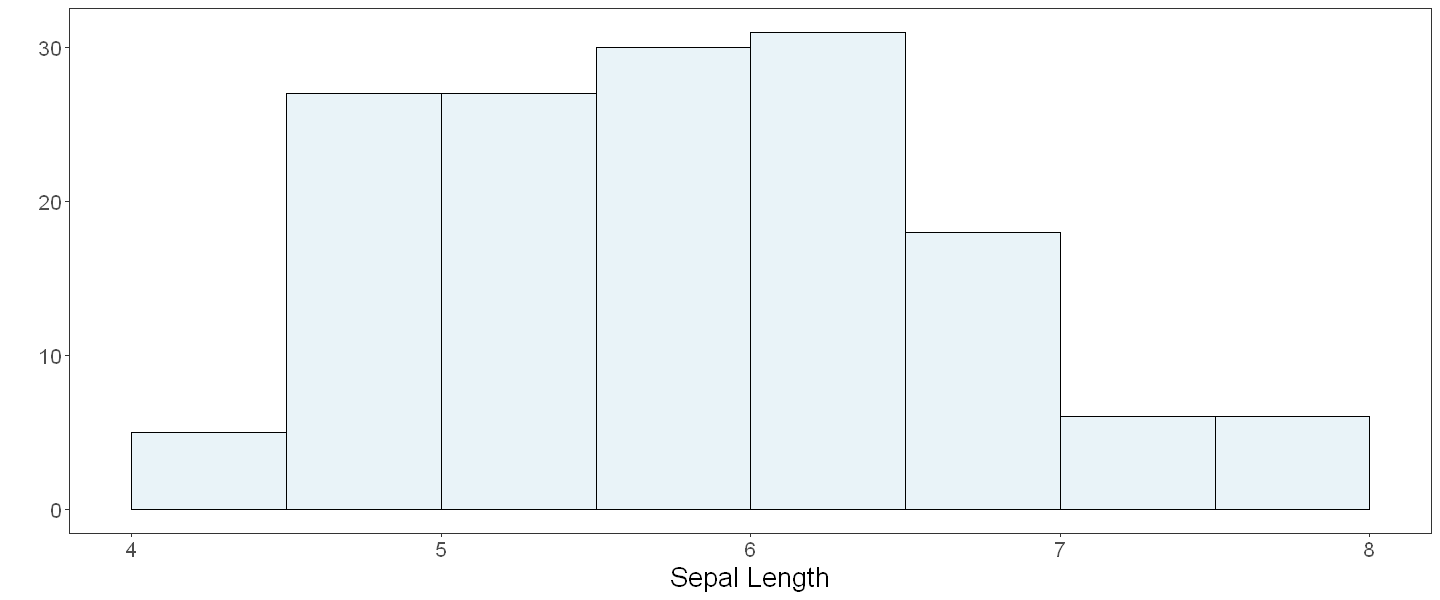

In [52]:
plot.hist(iris %>% dplyr::select(Sepal.Length), 
          label_x = "Sepal Length", color=colors[1]) + font

Grouping graphics

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables



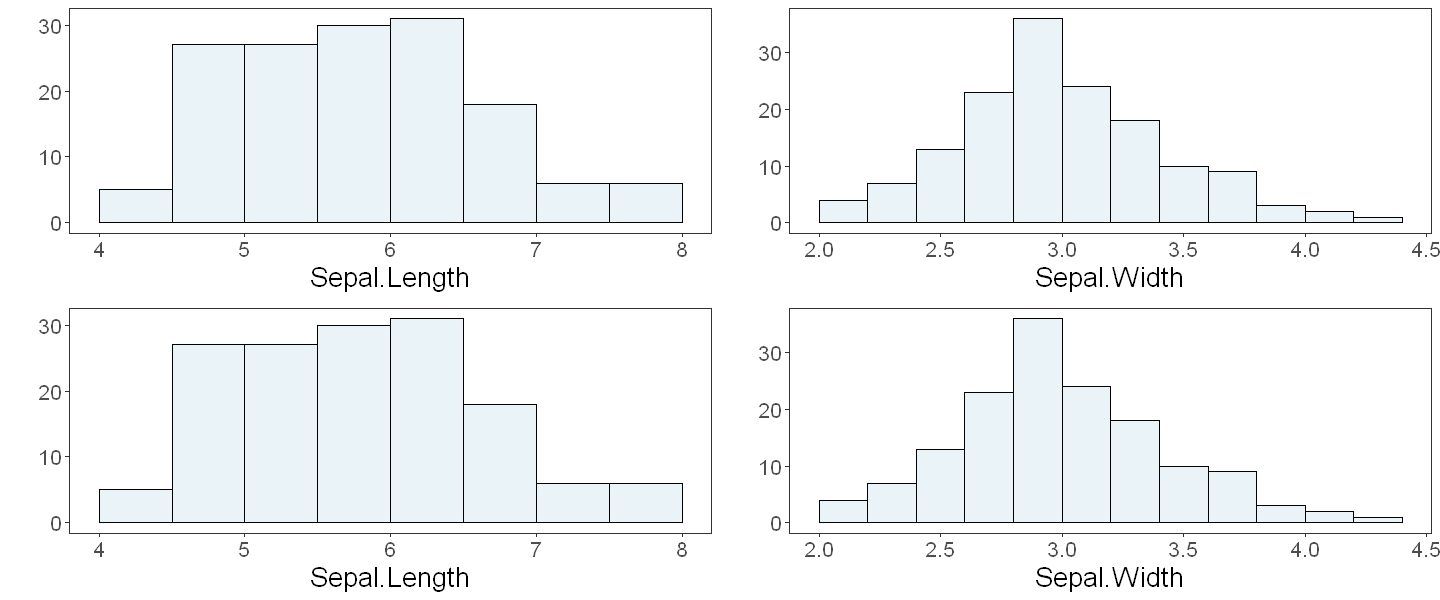

In [53]:
grf1 <- plot.hist(iris %>% dplyr::select(Sepal.Length), 
                  label_x = "Sepal.Length", color=colors[1]) + font
grf2 <- plot.hist(iris %>% dplyr::select(Sepal.Width), 
                  label_x = "Sepal.Width", color=colors[1]) + font  
grf3 <- plot.hist(iris %>% dplyr::select(Sepal.Length), 
                  label_x = "Sepal.Length", color=colors[1]) + font 
grf4 <- plot.hist(iris %>% dplyr::select(Sepal.Width), 
                  label_x = "Sepal.Width", color=colors[1]) + font

loadlibrary("gridExtra") 
grid.arrange(grf1, grf2, grf3, grf4, ncol=2)


In [54]:
loadlibrary("reshape")
data <- melt(iris)
head(data)

Using Species as id variables



,Species,variable,value
,<fct>,<fct>,<dbl>
1,setosa,Sepal.Length,5.1
2,setosa,Sepal.Length,4.9
3,setosa,Sepal.Length,4.7
4,setosa,Sepal.Length,4.6
5,setosa,Sepal.Length,5.0
6,setosa,Sepal.Length,5.4


### Box-plot analysis

Using Species as id variables



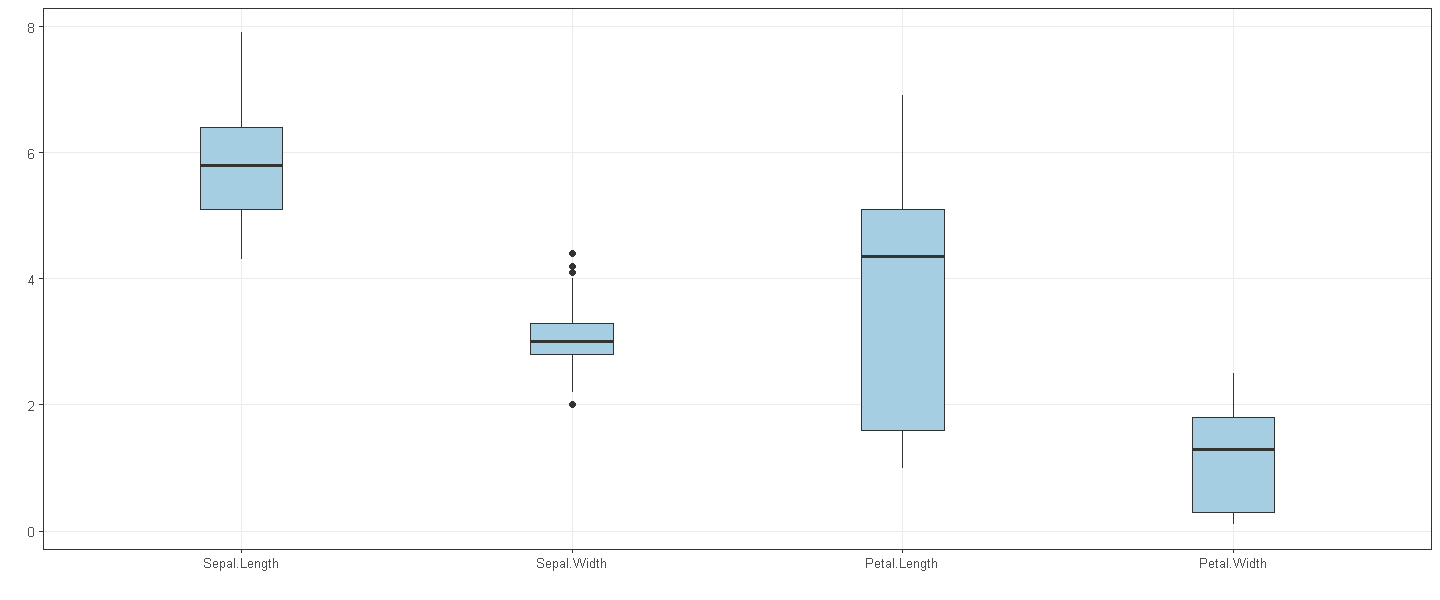

In [55]:
grfA <- plot.boxplot(iris, colors=colors[1])
plot(grfA)

### Density distribution

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables



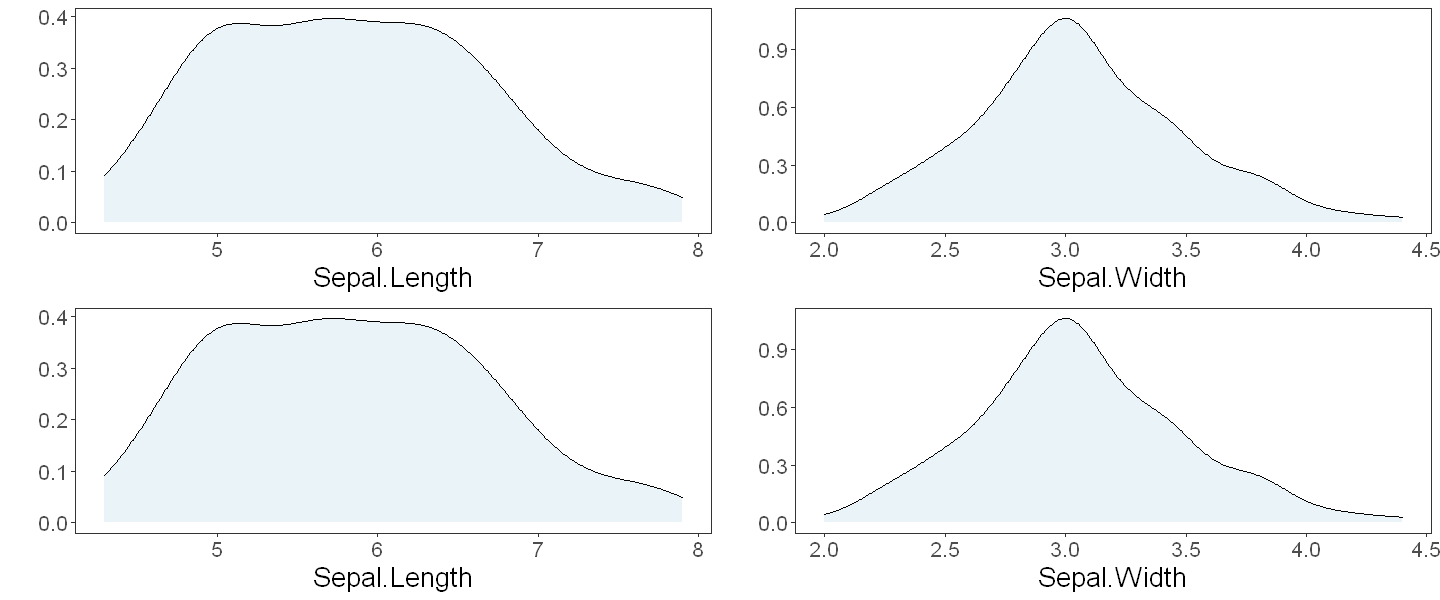

In [56]:
grf1 <- plot.density(iris %>% dplyr::select(Sepal.Length), 
                  label_x = "Sepal.Length", color=colors[1]) + font
grf2 <- plot.density(iris %>% dplyr::select(Sepal.Width), 
                  label_x = "Sepal.Width", color=colors[1]) + font  
grf3 <- plot.density(iris %>% dplyr::select(Sepal.Length), 
                  label_x = "Sepal.Length", color=colors[1]) + font 
grf4 <- plot.density(iris %>% dplyr::select(Sepal.Width), 
                  label_x = "Sepal.Width", color=colors[1]) + font

grid.arrange(grf1, grf2, grf3, grf4, ncol=2)


### Density distribution colored by the classifier

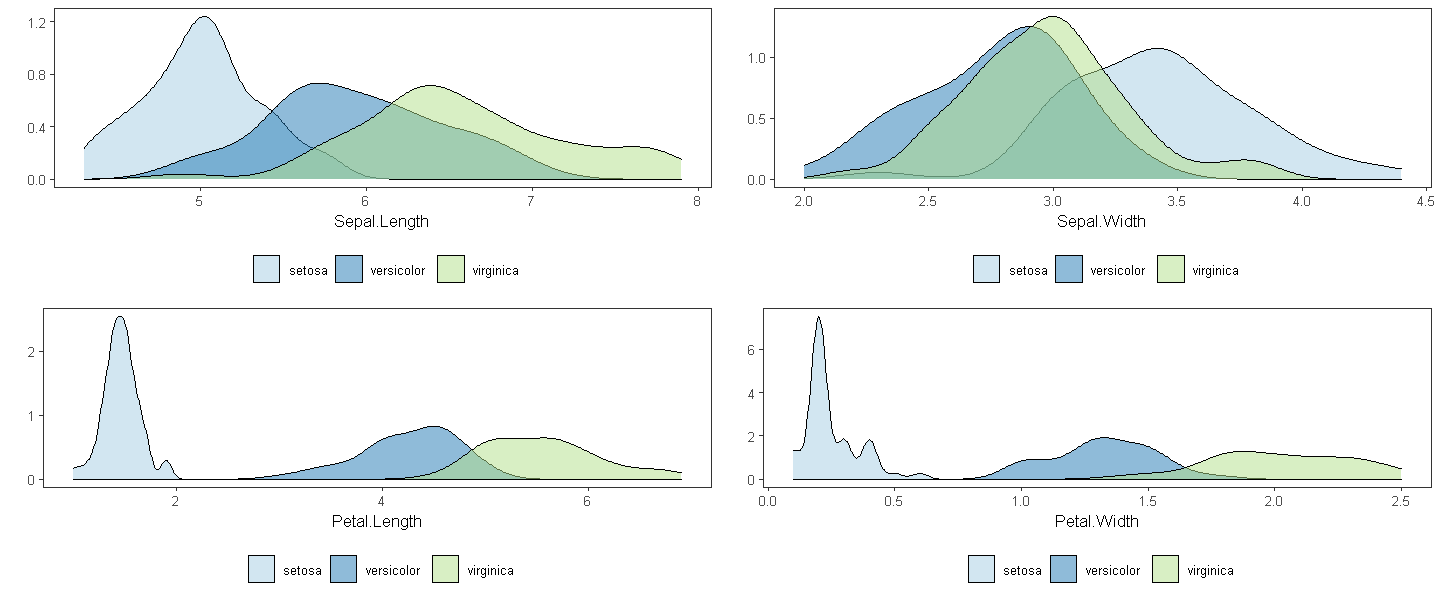

In [57]:
grfA <- plot.density.class(iris %>% dplyr::select(Species, Sepal.Length), 
                           class_label="Species", label_x = "Sepal.Length", color=colors[c(1:3)])
grfB <- plot.density.class(iris %>% dplyr::select(Species, Sepal.Width), 
                           class_label="Species", label_x = "Sepal.Width", color=colors[c(1:3)])
grfC <- plot.density.class(iris %>% dplyr::select(Species, Petal.Length), 
                           class_label="Species", label_x = "Petal.Length", color=colors[c(1:3)])
grfD <- plot.density.class(iris %>% dplyr::select(Species, Petal.Width), 
                           class_label="Species", label_x = "Petal.Width", color=colors[c(1:3)])
grid.arrange(grfA, grfB, grfC, grfD, ncol=2, nrow=2)


### Box-plot analysis grouped by the classifier

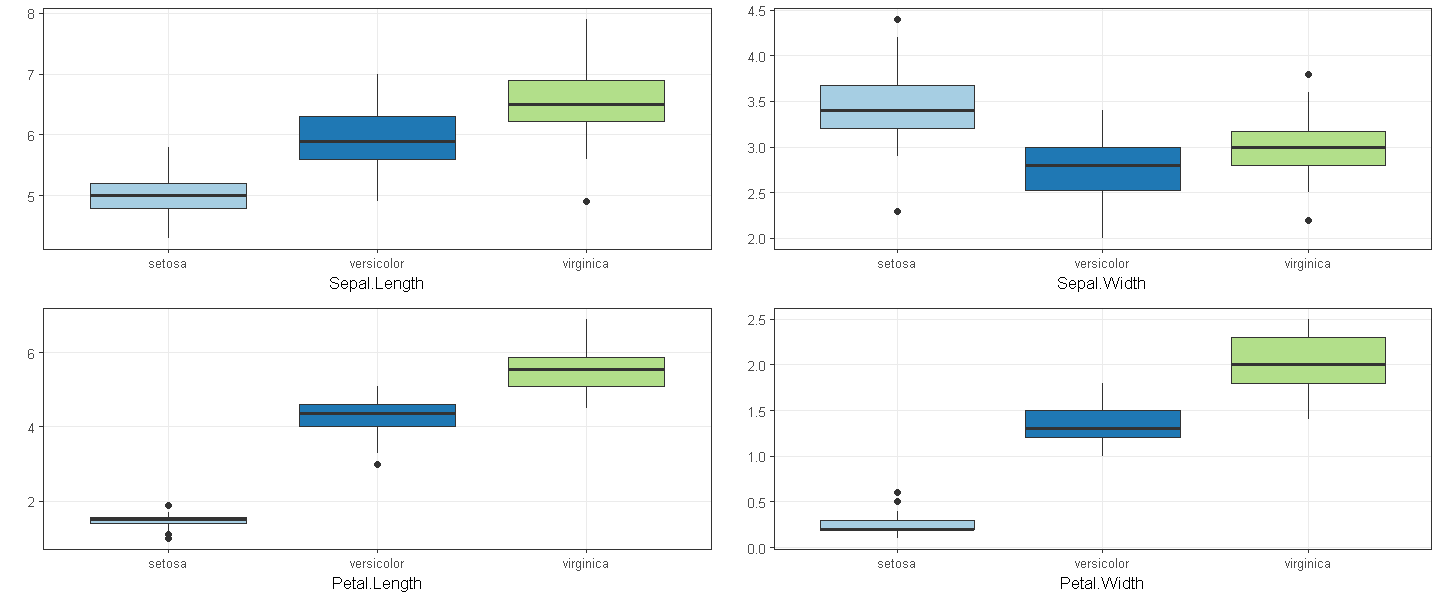

In [58]:
grfA <- plot.boxplot.class(iris %>% dplyr::select(Species, Sepal.Length), 
                           class_label="Species", label_x = "Sepal.Length", color=colors[c(1:3)])
grfB <- plot.boxplot.class(iris %>% dplyr::select(Species, Sepal.Width), 
                           class_label="Species", label_x = "Sepal.Width", color=colors[c(1:3)])
grfC <- plot.boxplot.class(iris %>% dplyr::select(Species, Petal.Length), 
                           class_label="Species", label_x = "Petal.Length", color=colors[c(1:3)])
grfD <- plot.boxplot.class(iris %>% dplyr::select(Species, Petal.Width), 
                           class_label="Species", label_x = "Petal.Width", color=colors[c(1:3)])
grid.arrange(grfA, grfB, grfC, grfD, ncol=2, nrow=2)

## Part 3

### Scatter plot

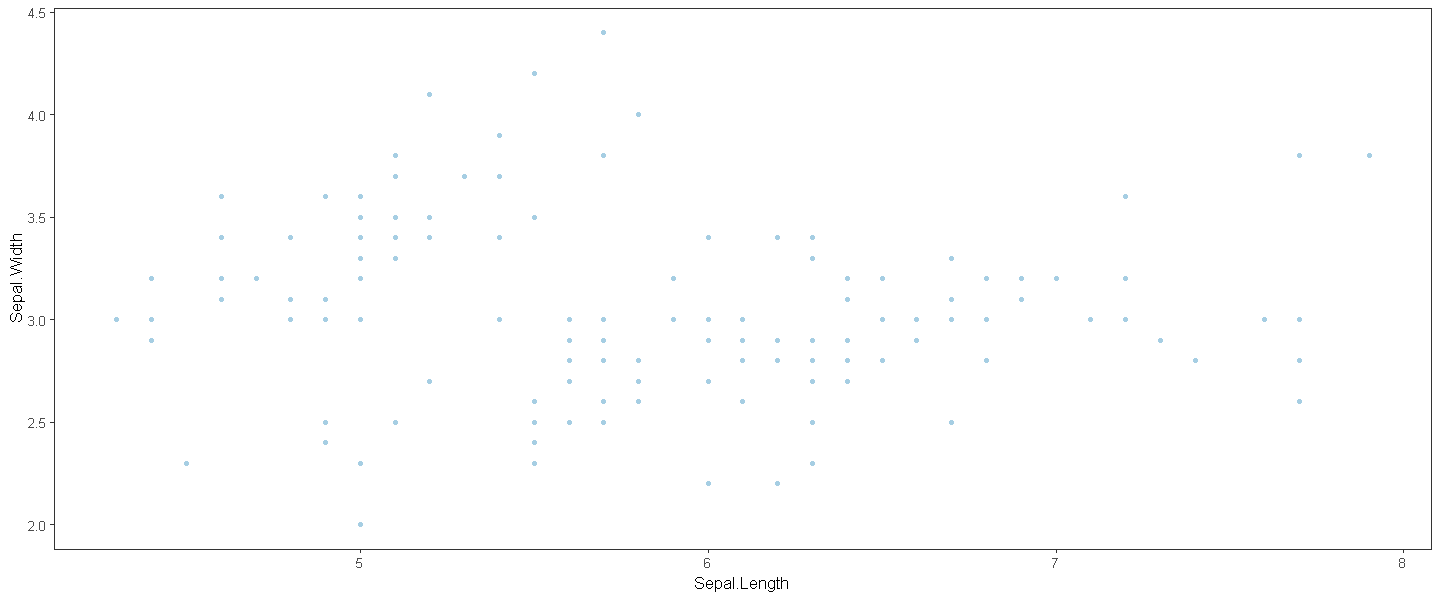

In [59]:
grf <- plot.scatter(iris %>% dplyr::select(Sepal.Length, Sepal.Width), 
                    label_x = "Sepal.Length", label_y = "Sepal.Width", colors=colors[1]) +
                    theme(legend.position = "none") 
plot(grf)

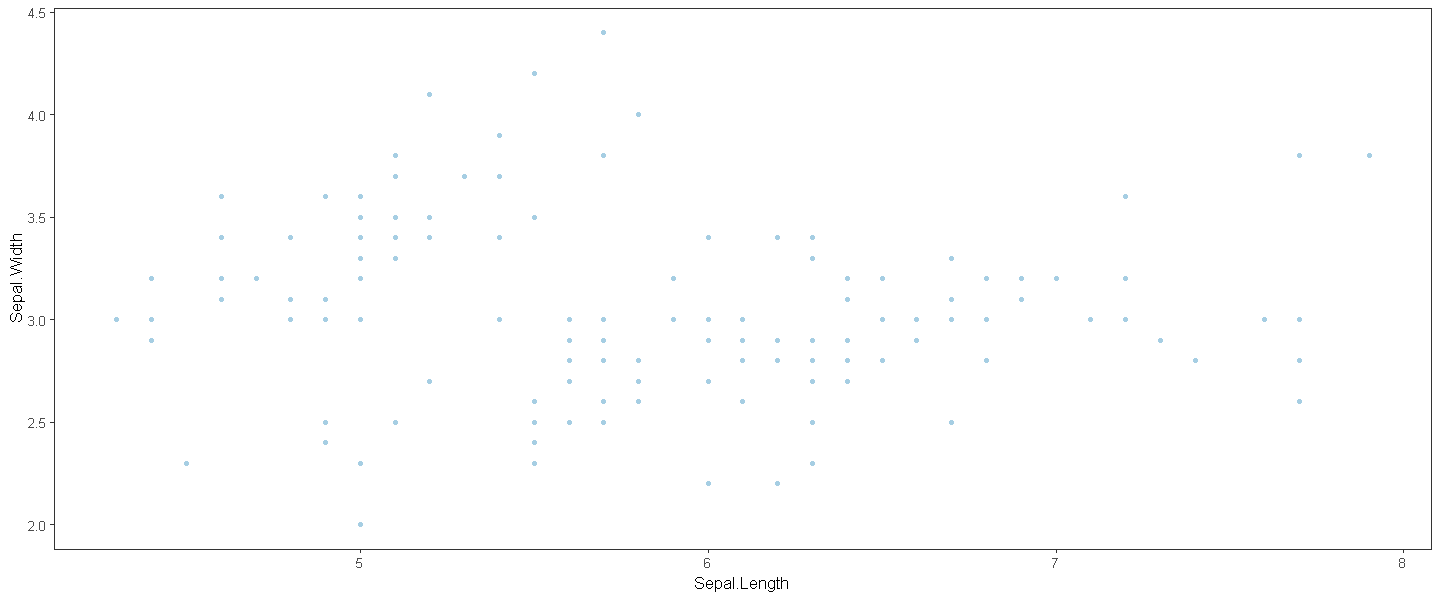

In [59]:
grf <- plot.scatter.class(iris %>% dplyr::select(Sepal.Length, Sepal.Width, Species), 
                    class_label="Species",
                    label_x = "Sepal.Length", label_y = "Sepal.Width", colors=colors[1:3])
plot(grf)

### Correlation matrix

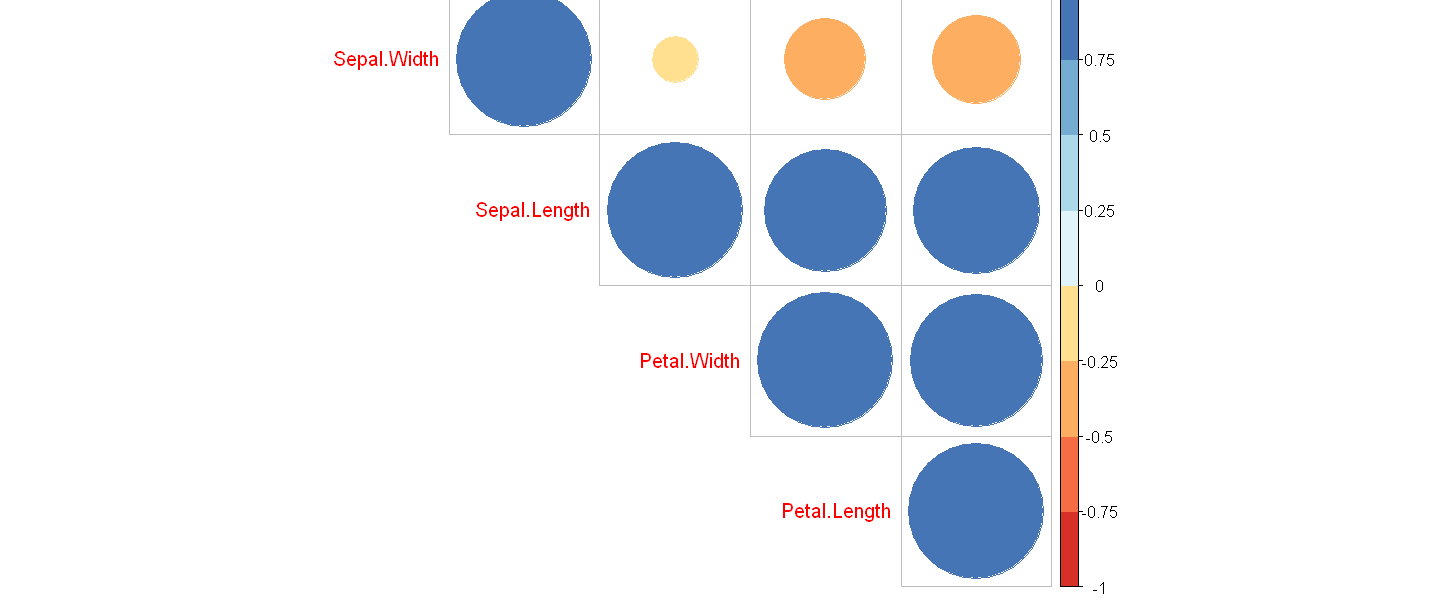

In [61]:
plot.correlation(iris %>% dplyr::select(Sepal.Width, Sepal.Length, Petal.Width, Petal.Length))

## Matrix dispersion

In [30]:
loadlibrary("WVPlots")
grf <- exp_pair_plot(data=iris, cnames=colnames(iris)[1:4], title="Iris", colors=mycolors[1])
grf


ERROR: Error in exp_pair_plot(data = iris, cnames = colnames(iris)[1:4], title = "Iris", : não foi possível encontrar a função "exp_pair_plot"


## Matrix dispersion by the classifier

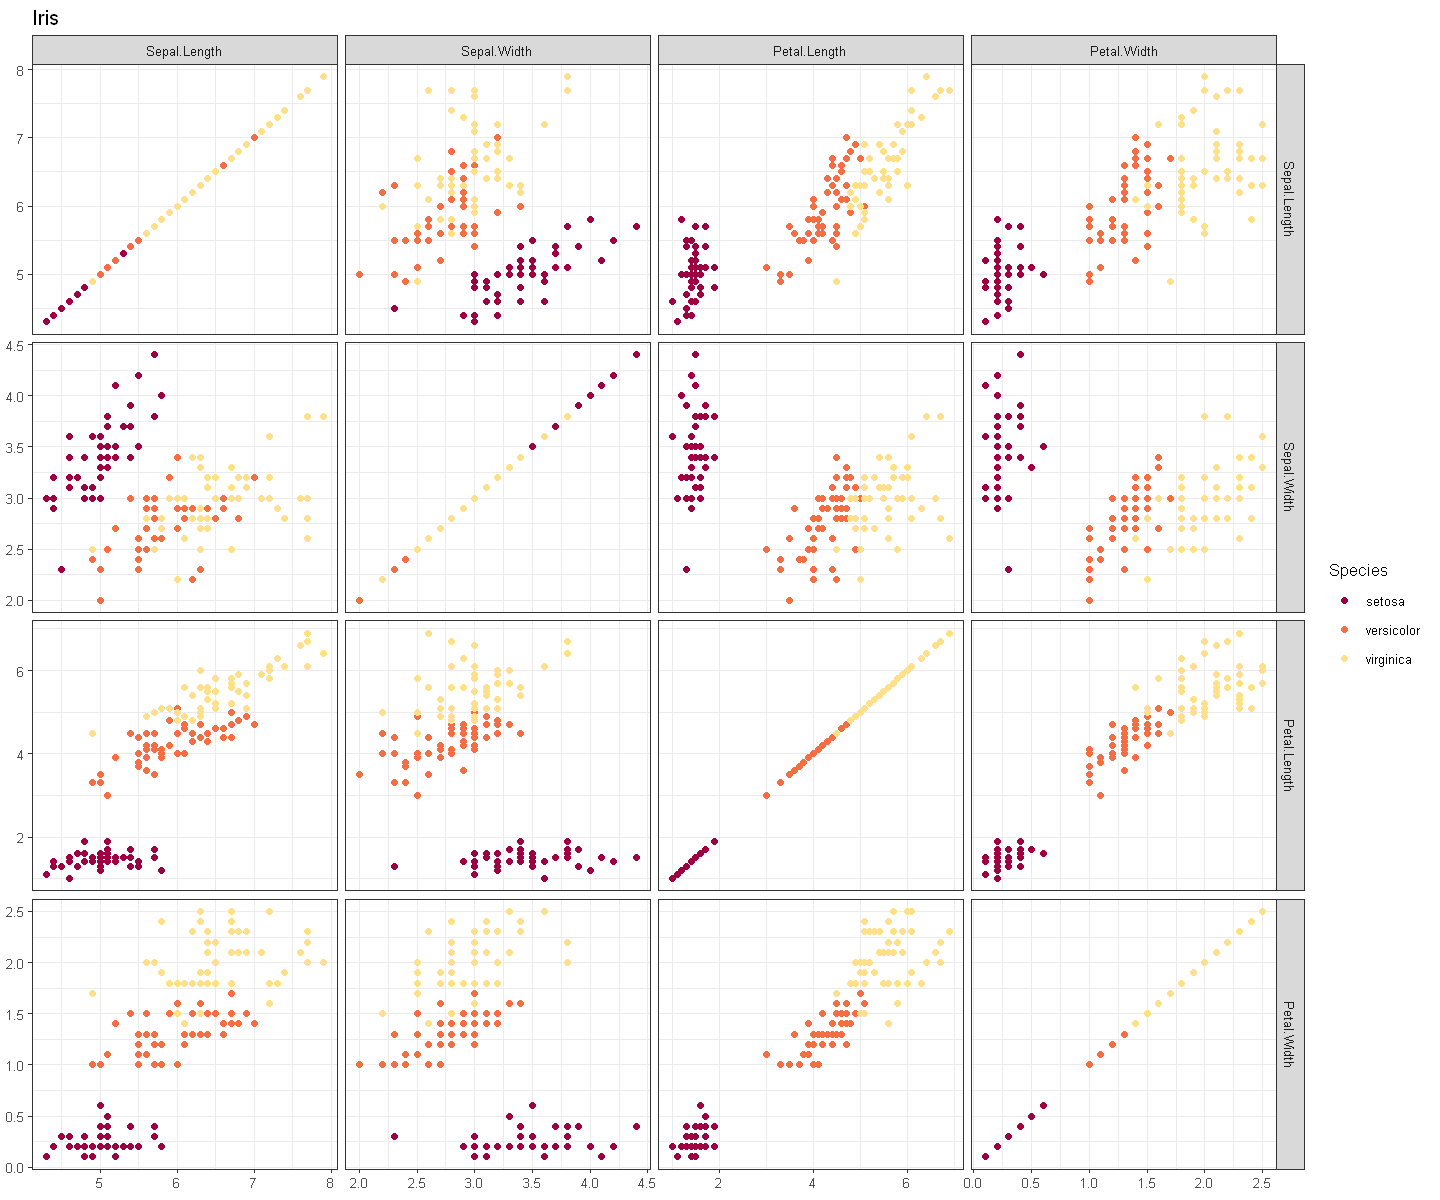

In [42]:
grf <- exp_pair_plot(data=iris, cnames=colnames(iris)[1:4], clabel='Species', title="Iris", colors=mycolors[1:3])
grf


## Advanced matrix dispersion

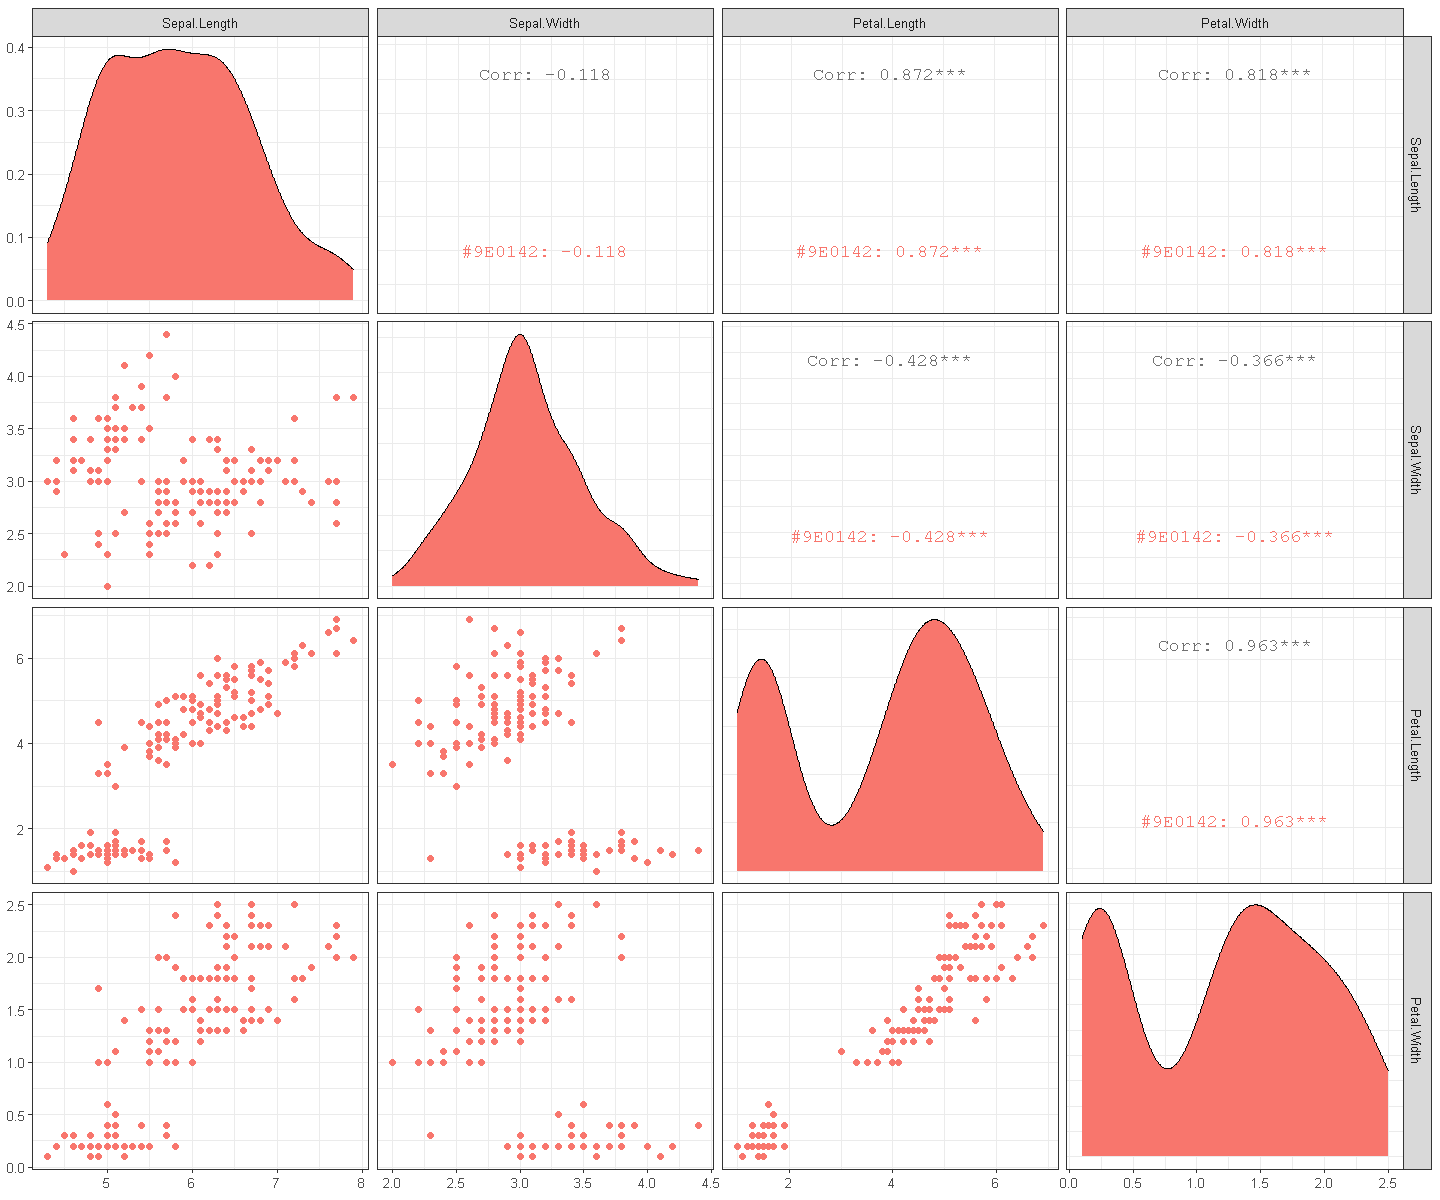

In [43]:
loadlibrary("GGally")
grf <- exp_advpair_plot(data=iris, cnames=colnames(iris)[1:4], title="Iris", colors=mycolors[1])
grf


## Advanced matrix dispersion with the classifier

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



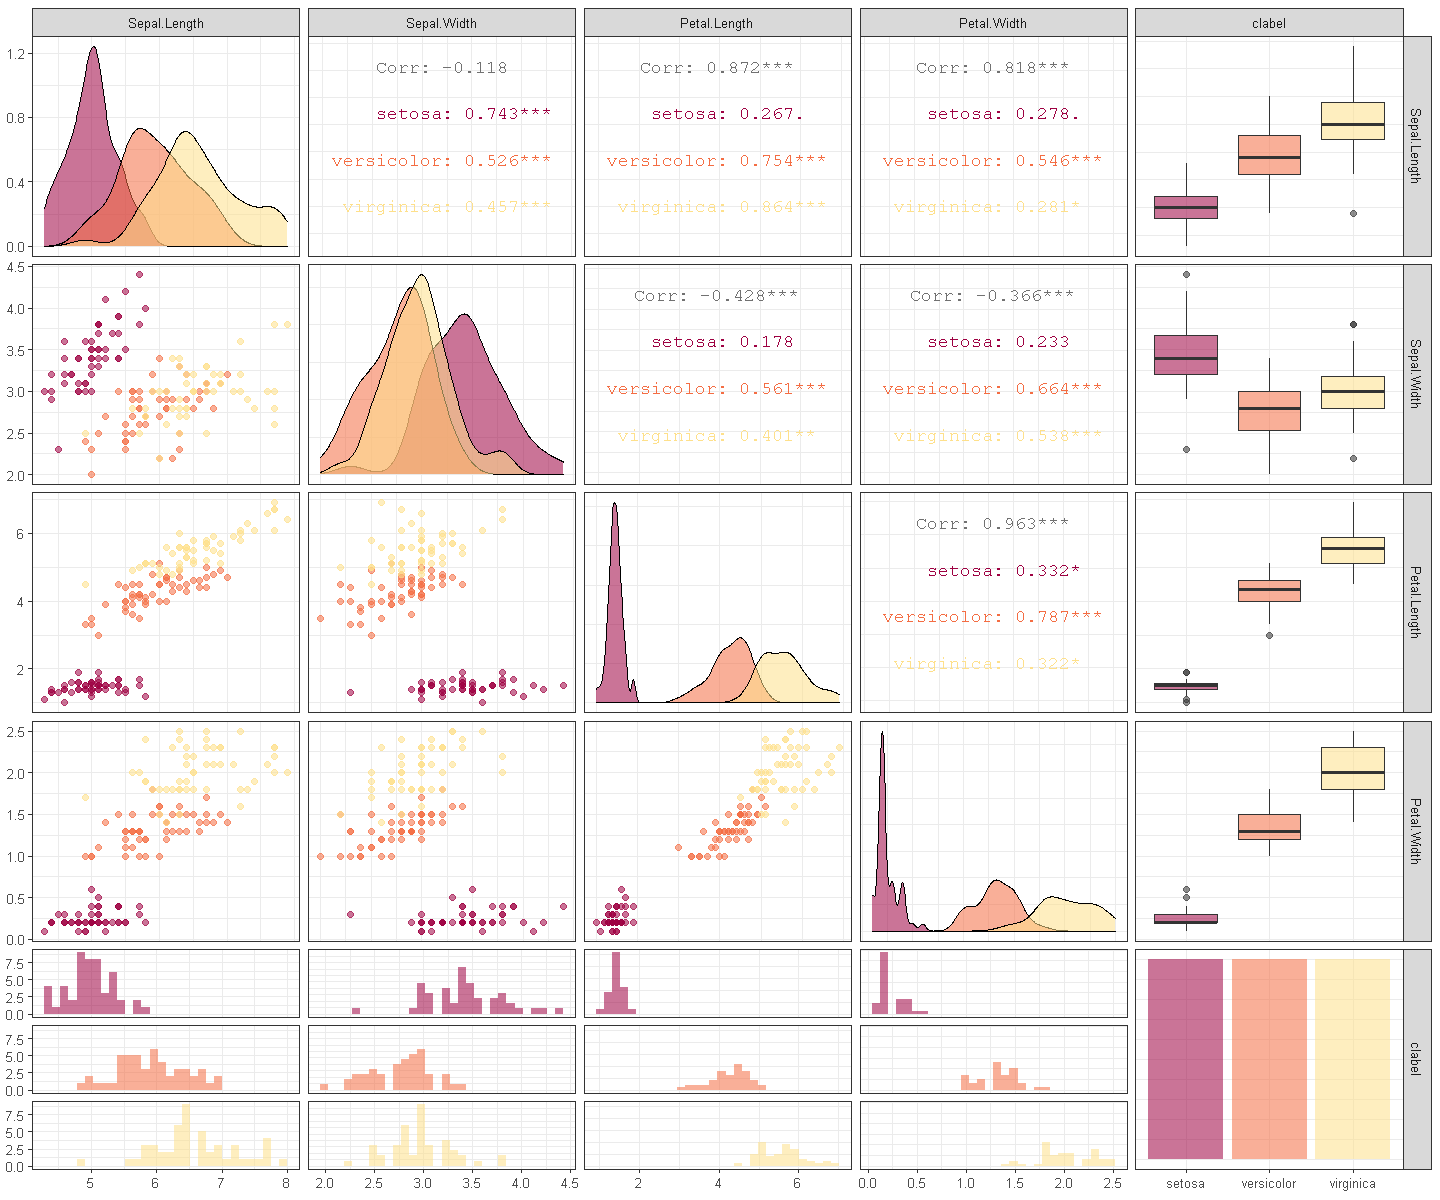

In [44]:
grf <- exp_advpair_plot(data=iris, cnames=colnames(iris)[1:4], title="Iris", clabel='Species', colors=mycolors[1:3])
grf


## Parallel coordinates

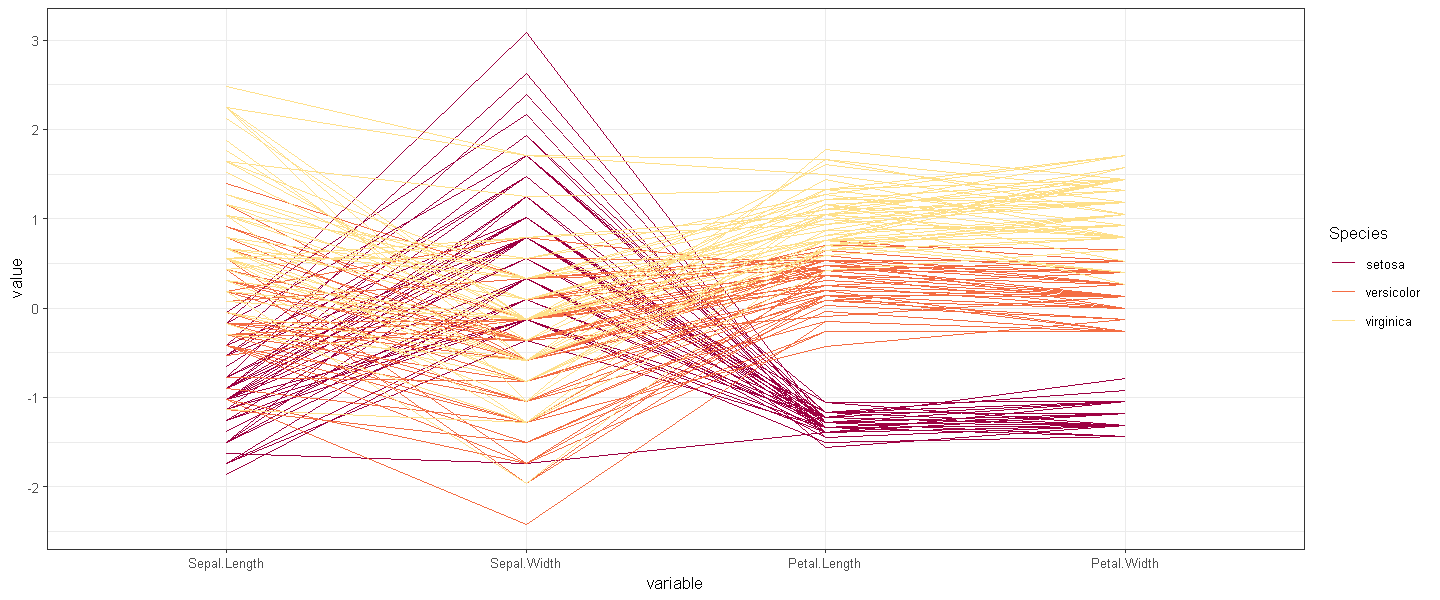

In [45]:
grf <- ggparcoord(data = iris, columns = c(1:4), group=5) + theme_bw(base_size = 10) + scale_color_manual(values=mycolors[1:3])
plot_size(12, 5)
plot(grf)


## Images

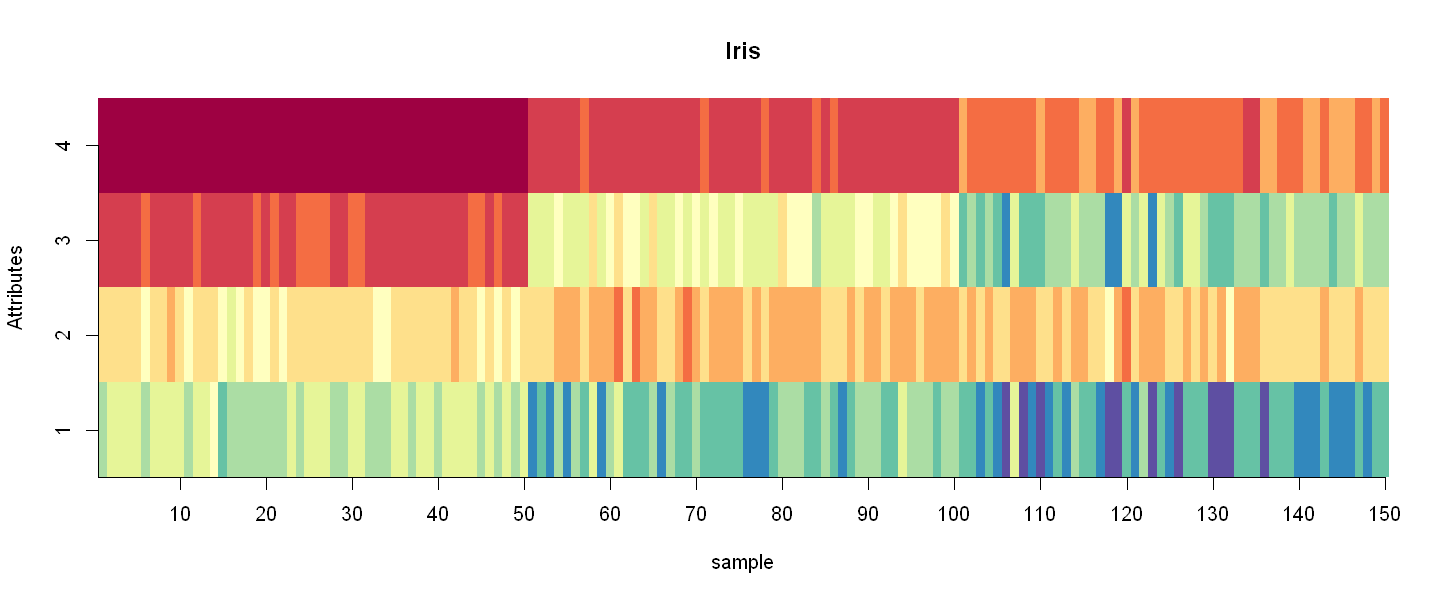

In [46]:
mat <- as.matrix(iris[,1:4])
x <- (1:nrow(mat))
y <- (1:ncol(mat))
image(x, y, mat, col = col.set, axes = FALSE,  main = "Iris", xlab="sample", ylab="Attributes")
axis(2, at = seq(0, ncol(mat), by = 1))
axis(1, at = seq(0, nrow(mat), by = 10))

## Chernoff faces

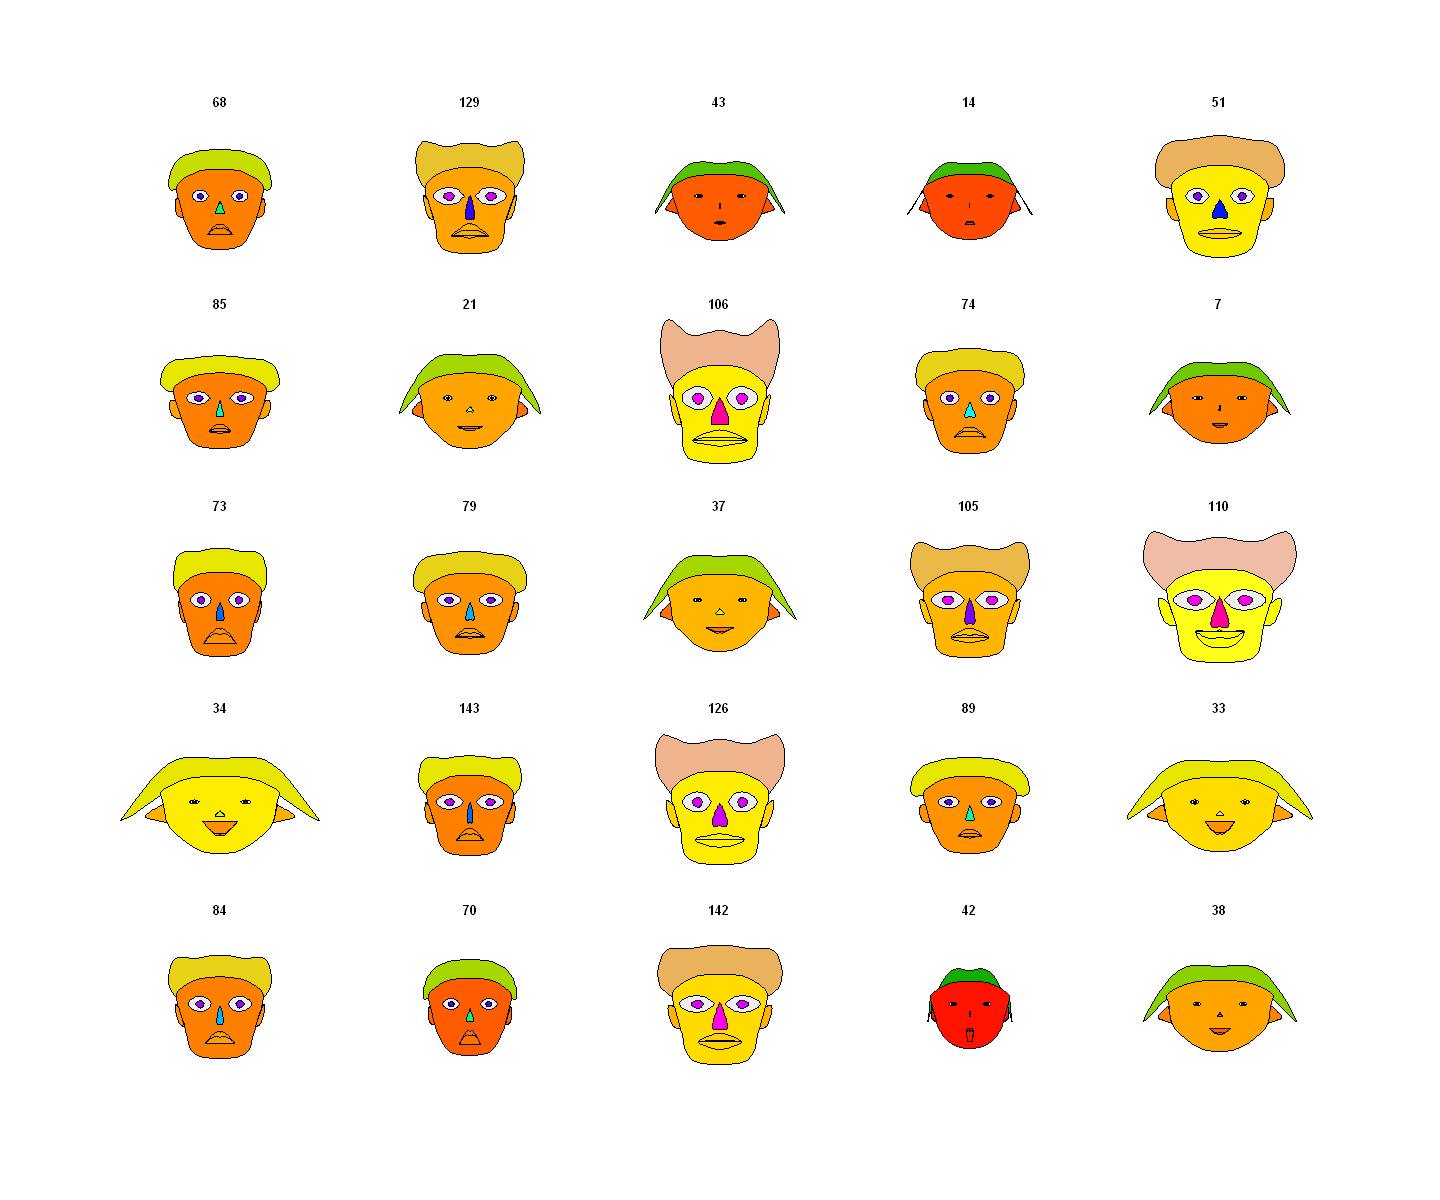

In [47]:
set.seed(1)
sample_rows = sample(1:nrow(iris), 25)

isample = iris[sample_rows,]
labels = as.character(rownames(isample))
isample$Species <- NULL


loadlibrary("aplpack")
plot_size(12, 10)
faces(isample, labels = labels, print.info=F, cex=1)

## Chernoff faces with the classifier

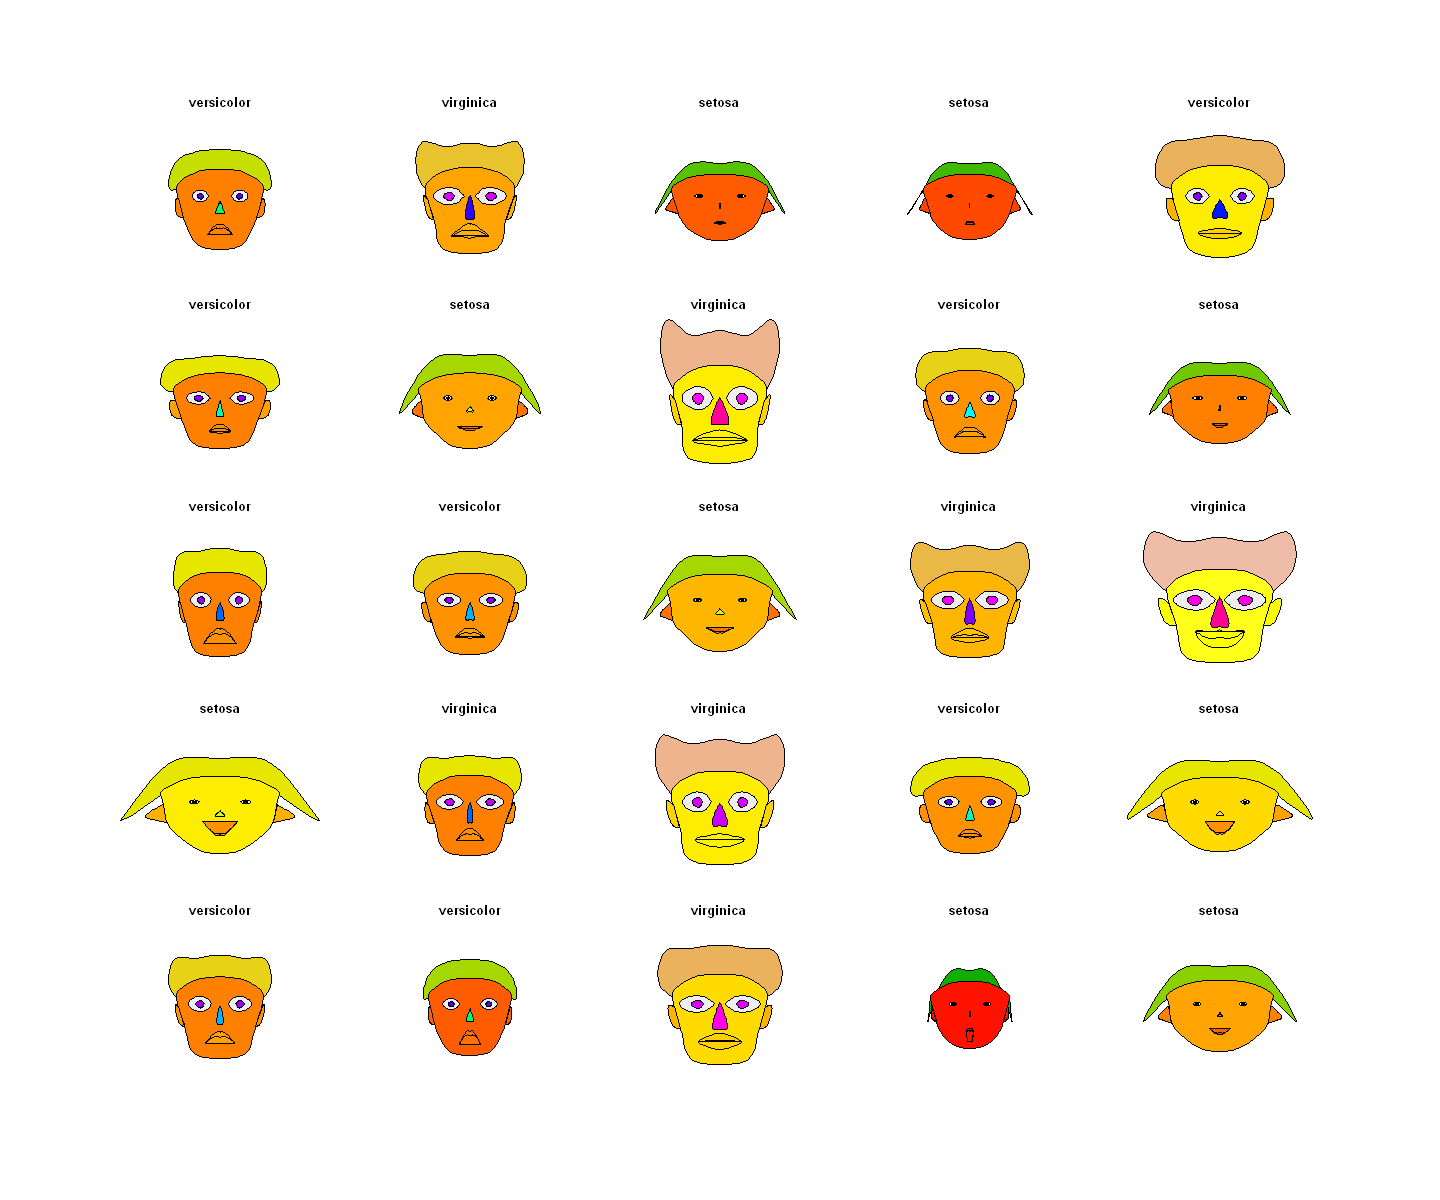

In [48]:
set.seed(1)
sample_rows = sample(1:nrow(iris), 25)

isample = iris[sample_rows,]
labels = as.character(isample$Species)
isample$Species <- NULL


faces(isample, labels = labels, print.info=F, cex=1)
